<a href="https://colab.research.google.com/github/prakashabhishek/deep_learning_with_tensorflow/blob/main/02_using_tensorflow_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
print(tf.__version__)
print('Available GPU device:',tf.config.list_physical_devices('GPU'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.datasets import make_circles


import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.5.0-rc2
Available GPU device: []


In this notebook we are going to build and fit various neural networks for classification problem.

* Binary classification
* Multiclass classification
* Multilabel classification


In [2]:
# Creating data to view and fit

n_sample = 1000

X, y = make_circles(n_samples=n_sample, noise = 0.03, random_state= 42)
print(X.shape, y.shape)

(1000, 2) (1000,)


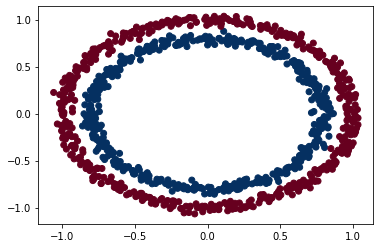

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdBu)
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape)

(800, 2) (200, 2)


In [5]:
# Set random state 
tf.random.set_seed(42)

# Build model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

history_1 = model_1.fit(x_train, y_train, epochs = 100, verbose = 0)

model_1.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4800


[0.6944702863693237, 0.47999998927116394]

Let's try and imrpove the model as it's basically guessing at this stage. 

In this stage we will just add 1 more hidden layer with 1 unit in the model

In [6]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

history_2 = model_2.fit(x_train, y_train, epochs = 100, verbose = 0)

model_2.evaluate(x_test, y_test)

7/7 [==============================] - 0s 835us/step - loss: 0.6947 - accuracy: 0.4800


[0.6947243213653564, 0.47999998927116394]

Model is still guessing,i.e, it's still underfitting on the train set resulting in high **Bias** so we need to make the model more complex.

We will now try tweaking various parameters like 
* activation function
* add more layers
* increasing the number of units(neurons) in each layer
* change optimization functions
* change learning rate 
* running it for longer epochs

In [7]:
# Increasing the number of units in hidden layers and adding 1 hidden layer
# Change optimizer to Adam

# Set random seed
tf.random.set_seed(42)

# Build the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(x_train, y_train, epochs = 100, verbose = 0)

model_3.evaluate(x_test, y_test)

7/7 [==============================] - 0s 834us/step - loss: 0.6948 - accuracy: 0.5650


[0.6947752237319946, 0.5649999976158142]

The accuracy has increased slightly but it's still not enough to call this model a good model. 

Let's visualize the predictions as try to find some patterns

In [8]:
def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by the model
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() - 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() - 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))

    # Create x values (we are going to make predictions on them)
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print('Doing for multi-class classification')
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Doing for binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(x[:, 0], x[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

Doing for binary classification


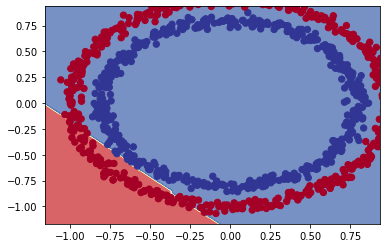

In [9]:
plot_decision_boundary(model_3, X, y)

Visualizing above image made us realize that the model is trying to fit a linear decision boundary to a non-linear problem. 

We will try to fit a model with a non linear activation function

In [10]:
# Set random seed
tf.random.set_seed(42)

# Build the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation= 'relu'),
                               tf.keras.layers.Dense(10, activation= 'relu'),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(x_train, y_train, epochs = 100, verbose = 0)

model_4.evaluate(x_test, y_test)

7/7 [==============================] - 0s 834us/step - loss: 0.0245 - accuracy: 1.0000


[0.02448953688144684, 1.0]

Doing for binary classification


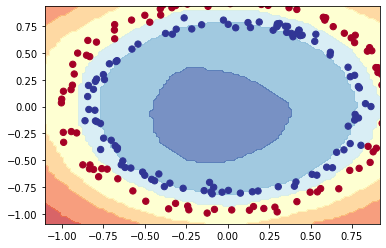

In [11]:
plot_decision_boundary(model_4, x_test, y_test)

# Trying out various hyper-parameters settings to see their effect

In [12]:
# Using activation = 'sigmoid'

# Set random seed
tf.random.set_seed(42)

# Build the model
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation= 'sigmoid'), 
                               tf.keras.layers.Dense(20, activation= 'sigmoid'),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics = ['accuracy'])

history_5 = model_5.fit(x_train, y_train, epochs = 100, verbose = 0)

model_5.evaluate(x_test, y_test)

7/7 [==============================] - 0s 835us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing for binary classification


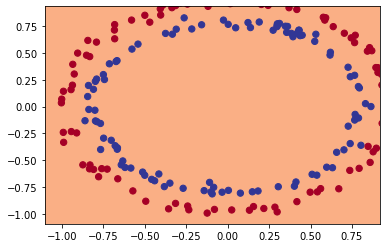

In [13]:
plot_decision_boundary(model_5, x_test, y_test)

In [14]:
# Using activation = 'sigmoid' and increasing number of units in hidden layers

# Set random seed
tf.random.set_seed(42)

# Build the model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation= 'sigmoid'), 
                               tf.keras.layers.Dense(50, activation= 'sigmoid'),
                               tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics = ['accuracy'])

history_6 = model_6.fit(x_train, y_train, epochs = 100, verbose = 0)

model_6.evaluate(x_test, y_test)

7/7 [==============================] - 0s 835us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing for binary classification


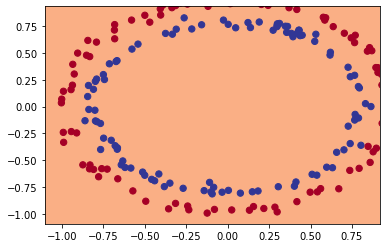

In [15]:
plot_decision_boundary(model_6, x_test, y_test)

# Non linear activation functions

* Sigmoid activation function
    * Ranges between 0 and 1


* Relu activation function
    * Values have lower limit at 0 with no upper limit


* Tanh activation function
    * Ranges between -1 and 1
    
    

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [17]:
arr = tf.constant(np.arange(-20,20,1))
arr

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
        -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
         6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19])>

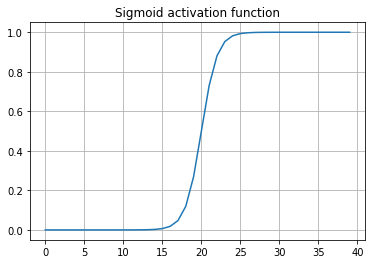

In [18]:
plt.plot(sigmoid(arr))
plt.title('Sigmoid activation function')
plt.grid()
plt.show()

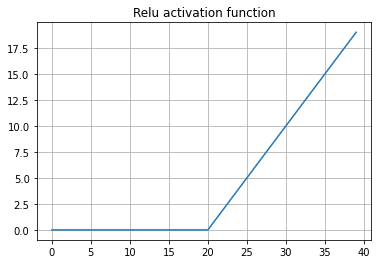

In [19]:
plt.plot(relu(arr))
plt.title('Relu activation function')
plt.grid()
plt.show()

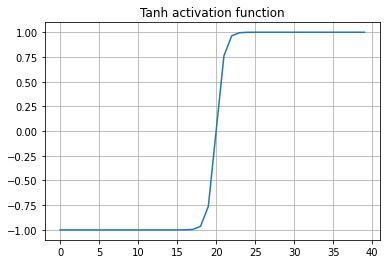

In [20]:
plt.plot(tanh(arr))
plt.title('Tanh activation function')
plt.grid()
plt.show()

#### Using callbacks to get ideal learning rate

In [42]:
# Set random seed
tf.random.set_seed(42)

# Build model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Define learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_7 = model_7.fit(x_train, y_train, epochs=100, callbacks= [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 834us/step - loss: 0.6917 - recall_3: 0.0025 - precision_1: 0.5000   
Epoch 2/100
25/25 [==============================] - 0s 750us/step - loss: 0.6910 - recall_3: 0.0025 - precision_1: 0.3333  
Epoch 3/100
25/25 [==============================] - 0s 709us/step - loss: 0.6903 - recall_3: 0.0050 - precision_1: 0.3333  
Epoch 4/100
25/25 [==============================] - 0s 709us/step - loss: 0.6897 - recall_3: 0.0300 - precision_1: 0.6667  
Epoch 5/100
25/25 [==============================] - 0s 750us/step - loss: 0.6888 - recall_3: 0.0450 - precision_1: 0.5806
Epoch 6/100
25/25 [==============================] - 0s 917us/step - loss: 0.6881 - recall_3: 0.0700 - precision_1: 0.5600
Epoch 7/100
25/25 [==============================] - 0s 834us/step - loss: 0.6873 - recall_3: 0.0825 - precision_1: 0.5323
Epoch 8/100
25/25 [==============================] - 0s 917us/step - loss: 0.6864 - recall_3: 0.0900 - precision_1: 0.5538
Epoch 9

25/25 [==============================] - 0s 834us/step - loss: 0.1312 - recall_3: 0.9525 - precision_1: 0.9501
Epoch 68/100
25/25 [==============================] - 0s 875us/step - loss: 0.0785 - recall_3: 0.9650 - precision_1: 0.9650
Epoch 69/100
25/25 [==============================] - 0s 875us/step - loss: 0.0954 - recall_3: 0.9600 - precision_1: 0.9600
Epoch 70/100
25/25 [==============================] - 0s 834us/step - loss: 0.1367 - recall_3: 0.9475 - precision_1: 0.9499
Epoch 71/100
25/25 [==============================] - 0s 875us/step - loss: 0.2288 - recall_3: 0.9325 - precision_1: 0.9256
Epoch 72/100
25/25 [==============================] - 0s 875us/step - loss: 0.3502 - recall_3: 0.8325 - precision_1: 0.8430
Epoch 73/100
25/25 [==============================] - 0s 750us/step - loss: 0.2246 - recall_3: 0.9100 - precision_1: 0.9123
Epoch 74/100
25/25 [==============================] - 0s 875us/step - loss: 0.1769 - recall_3: 0.9375 - precision_1: 0.9058
Epoch 75/100
25/25 [=

In [29]:
lr_rates = [1e-4*10**(epoch/20) for epoch in range(1, 101)]

<AxesSubplot:xlabel='epochs'>

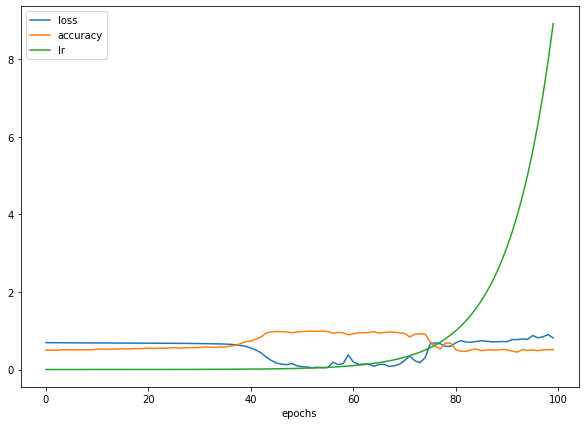

In [23]:
# Check out the history

pd.DataFrame(history_7.history).plot(figsize = (10, 7), xlabel = 'epochs')

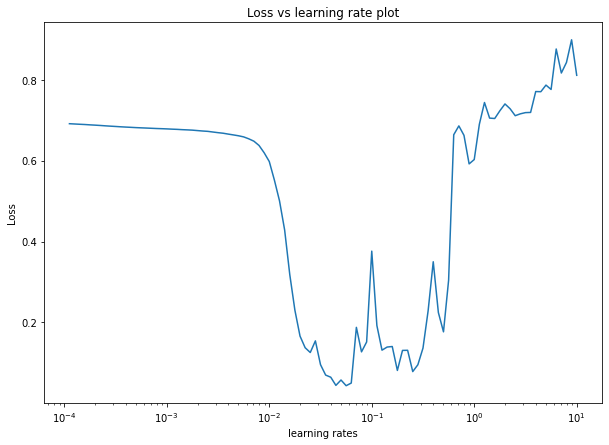

In [33]:
plt.figure(figsize= (10, 7))
plt.semilogx(lr_rates, history_7.history['loss'])
plt.ylabel('Loss')
plt.xlabel('learning rates')
plt.title('Loss vs learning rate plot')
plt.show()

In [39]:
tf.metrics.serialize(tf.keras.metrics.Recall())

{'class_name': 'Recall',
 'config': {'name': 'recall_1',
  'dtype': 'float32',
  'thresholds': None,
  'top_k': None,
  'class_id': None}}